# GRIPJULY2021-The Sparks Foundation
## Task1: Predict the percentage of an student based on the no. of study hours.
### Author: Vamsi Vasamsetti

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the dataset via url
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

### Exploratory data analysis

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()  #checking null values in the dataset

Hours     0
Scores    0
dtype: int64

No null values present in the dataset.

In [6]:
print('Shape of the Dataset-->',df.shape)
print ('Columns names -->',df.columns)
print ('Columns Datatype -->', df.dtypes)

Shape of the Dataset--> (25, 2)
Columns names --> Index(['Hours', 'Scores'], dtype='object')
Columns Datatype --> Hours     float64
Scores      int64
dtype: object


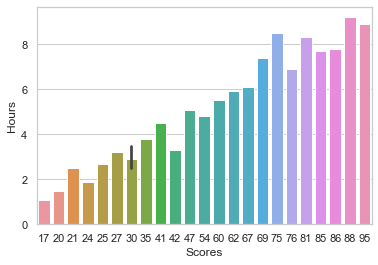

In [7]:
sns.set_theme(style="whitegrid")
df_plot= sns.barplot(x="Scores", y="Hours", data=df)

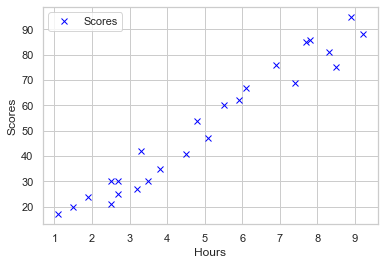

In [8]:
df.plot(x = 'Hours', y = 'Scores', style = 'x',color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<AxesSubplot:>

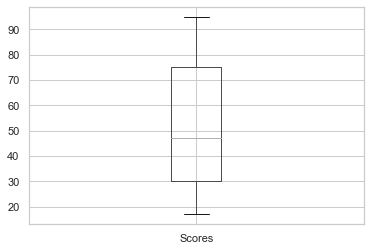

In [9]:
df.boxplot(['Scores'])

<AxesSubplot:>

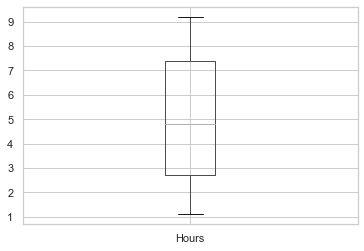

In [10]:
df.boxplot(['Hours'])

No major outliners present in the dataset.

## Linear Regression model

X=Hours--->Independent variable

Y=Scores-->Dependent variable

In [11]:
X=df.drop("Scores", axis=1)
Y=df['Scores']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Splitting the dataset into X_train,Y_train,X_test,Y_test


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [15]:
# Create linear regression object
model = LinearRegression()

In [16]:
# Train the model using the training sets
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
# Make predictions using the testing set
pred = model.predict(X_test)
pred

array([11.02900268, 25.62801721, 19.3712967 , 95.49472962, 71.51063432,
       27.71359072, 88.19522235, 25.62801721])

In [18]:
print('Training Score : ', model.score(X_train, Y_train))
print('Test Score : ', model.score(X_test, Y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434517


In [19]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [10.42786752]


In [20]:
# The intercept
print('Intercept: \n', model.intercept_)

Intercept: 
 -0.4416515935882046


In [21]:
# Actaul vs Predicted vs Residual
result = pd.DataFrame({'Actual Score': Y_test,'Predicted Score': pred, 'Residual':Y_test-pred })
print(result.head())

    Actual Score  Predicted Score  Residual
14            17        11.029003  5.970997
0             21        25.628017 -4.628017
17            24        19.371297  4.628703
6             88        95.494730 -7.494730
23            76        71.510634  4.489366


### METRICS EVALUATION

In [22]:
print('Mean absolute error : ', metrics.mean_absolute_error(Y_test, pred))

Mean absolute error :  5.936576124243741


In [23]:
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Root mean square error :  6.66533311149813


In [24]:
metrics.r2_score(Y_test,pred)

0.9420584734434517

### OUTPUT PLOTS

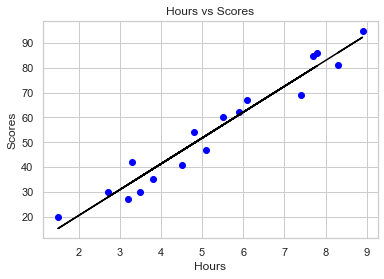

In [25]:
plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'black')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

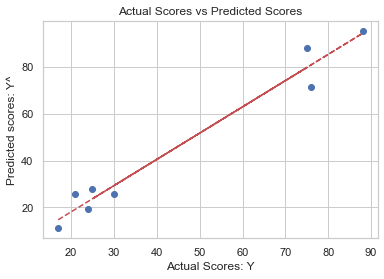

In [26]:
x=Y_test
y=pred
plt.scatter(x, y)
plt.xlabel("Actual Scores: Y")
plt.ylabel("Predicted scores: Y^")
plt.title("Actual Scores vs Predicted Scores")
# Plotting the Best fit line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

### Using the above model we predict the score of the student if he studies for 9.25 hours/day

In [27]:
study_hours = 9.25
score_pred = model.predict([[study_hours]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 96.01612299632008
